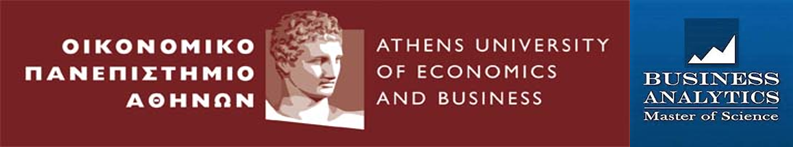

# Assignment Code | Course : Machine Learning & Content Analytics 

* Iliaki Georgia (f2821902)
* Michaella Kintaka (f2821904)
* Danai Stavroula Stefanopoulou (f2821913)


In [ ]:
from pathlib import Path
import pandas as pd
from tqdm import tqdm
from pprint import pprint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

# 1. Data Import 
 
First and foremost the class "ArgumentParser"** is loaded and then all the text files of the "argument" folder are loaded through this class. The class includes the "setup_without_context" function which defined the appropriate format of the text files. 
 
The "setup_without_context" is not taking into account the information about the sequence of the sentence in the text. This means that we are basing our decision in the Multiclass Classification problem according to the words that each sentence contains and not on the "neighboring” sentences in the  text file.
 
As for the format that was prior referred, some changes will happen during parsing of the sentences. For example, if there is the "_" symbol or the text "Missing" in the "label" column, a replacement with the phrase "NO LABEL" will occur. Then all the strings in the "label" column will be converted to uppercase.(str.upper()). 
 
In conclusion, all these text files are parsed in one dataset with two columns, "label" and "sentence", and numbering 11064 rows.

**The function "ArgumentParser" was provided by George Perakis for the purpose of reading the data and creating the dataset apropriate for the project

In [ ]:
class ArgumentParser:

    @staticmethod
    def get_argument_files():
      #all the csv paths from the 'argument' file are 
        return list(Path('argument').glob('**/*.csv')) #all the file paths

    def setup_without_context(self):
        files = self.get_argument_files()
        frames = list()

        for file_path in tqdm(files):
            df = pd.read_csv(file_path)
            df['label'] = df['label'].str.strip()
            df['label'].replace('_', 'NO LABEL', inplace=True) # the '-' is replaced by No Label
            df['label'].replace('Missing', 'NO LABEL', inplace=True) #the missing is replaced by No label
            df['label'] = df['label'].str.strip().str.upper()

            frames.append(df)#everything is appended into the dataframe

        data = pd.concat(frames).reset_index(drop=True)
        return {'X': data['sentence'].tolist(),
                'y': data['label'].tolist(),
                'df': data}

if __name__ == "__main__":
    parser = ArgumentParser() #kickstart the procedure
    swc_doc = parser.setup_without_context()
    pprint(swc_doc['X'][:5])
    pprint(swc_doc['y'][:5])
    print(swc_doc['df']['label'].value_counts())
    print(swc_doc['df'])

100%|██████████| 889/889 [00:03<00:00, 287.89it/s]


['Evaluation of CO2 absorption performance by molecular dynamic simulation for '
 'mixed secondary and tertiary amines',
 'Abstract: CO2 emission to the atmosphere is the most prominent cause of '
 'climate change and a major risk to environmental health.',
 'Although several techniques are very promising to reduce the CO2 emission '
 'from central emission points, the CO2 absorption by amines remains the most '
 'mature and reliable technology.',
 'Yet, there is more potential to improve absorption performance by choosing '
 'suitable solvents.',
 'Thus, the present research is intended to explore a better solvent '
 'combination for CO2 absorption by adopting the amine absorption process '
 'using molecular dynamic simulation.']
['NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL']
NO LABEL    8588
EVIDENCE    1486
CLAIM        990
Name: label, dtype: int64
          label                                           sentence
0      NO LABEL  Evaluation of CO2 absorption performa

Before we begin the building process of our model we should take a look at the structure of our data. As we can notice most of the sentences have no label (8588 out of 11064 sentences). This is something expected as long as each abstract in a scientific article contains more sentences describing the content than the claims and their shreds of evidence.

In [ ]:
swc_doc['df']['label'].value_counts() #how many of each Label

NO LABEL    8588
EVIDENCE    1486
CLAIM        990
Name: label, dtype: int64

In [ ]:
Verification=swc_doc['df']['label'].value_counts()
numerOfSent=Verification['NO LABEL']+Verification['EVIDENCE']+Verification['CLAIM']
numerOfSent==len(swc_doc['df']) #verification of the number of data

True


The first step is to set up x ('sentence') and y('label') variables for the model. 




In [ ]:
x=swc_doc['df']['sentence']
x #the  indipendent variable

0        Evaluation of CO2 absorption performance by mo...
1        Abstract: CO2 emission to the atmosphere is th...
2        Although several techniques are very promising...
3        Yet, there is more potential to improve absorp...
4        Thus, the present research is intended to expl...
                               ...                        
11059    Method: Qualitative study, from semi-structure...
11060    Data analysis occurred through thematic conten...
11061    Results: The category “vulnerability of women ...
11062    Conclusions: Vulnerability was apprehended in ...
11063    These vulnerabilities must be considered in th...
Name: sentence, Length: 11064, dtype: object

In [ ]:
y=swc_doc['df']['label'] #y= label , to be predicted/ the dependant variable
y

0        NO LABEL
1        NO LABEL
2        NO LABEL
3        NO LABEL
4        NO LABEL
           ...   
11059    NO LABEL
11060    NO LABEL
11061    EVIDENCE
11062       CLAIM
11063    NO LABEL
Name: label, Length: 11064, dtype: object

# 2. Text Processing

This time we use a different way to replace the sumbols included in the dataset and  Tokenizer to convert the text into integers. Then, the stopwords are removed.


Before we implement the vectorizer, we procced some  text processing. The changes that they took place  where:
 
1. Remove all the symbols and numbers in the text
2. Make lowercase all the characters
3. Remove all the stopwords

In [ ]:
x= x.str.replace('[^\w\s]','')
x.head(15)

0     Evaluation of CO2 absorption performance by mo...
1     Abstract CO2 emission to the atmosphere is the...
2     Although several techniques are very promising...
3     Yet there is more potential to improve absorpt...
4     Thus the present research is intended to explo...
5     The study is designed to compare the intermole...
6     The molecular dynamic simulations were perform...
7     The solvent concentration 30 wt under the cond...
8     The results were interpreted by the Radial Dis...
9     It was found that the blend of secondary and t...
10    This finding shows that piperazine acts as a p...
11        Prevalence of domestic violence against women
12                             Background and Objective
13    Domestic violence is the most common against w...
14    This study was performed to determine the prev...
Name: sentence, dtype: object

In [ ]:
x= x.str.lower()
x.head()

0    evaluation of co2 absorption performance by mo...
1    abstract co2 emission to the atmosphere is the...
2    although several techniques are very promising...
3    yet there is more potential to improve absorpt...
4    thus the present research is intended to explo...
Name: sentence, dtype: object

The english stopwords list is provided by the library nltk and is previwed below

In [ ]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In order to remove the stopwords first all the words in the data (x) must be converted into tokens. The following piece of code is from https://towardsdatascience.com/cnn-sentiment-analysis-1d16b7c5a0e7


All the data are tokenized and compared to the stopwords list. Then the stopwords are removed from each sentence and then re-joined as x again.

In [ ]:
tokens = [word_tokenize(sen) for sen in x] #All words are turned into tokens and saved in a dataframe "tokens"

In [ ]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens] #all tokens are turned into lower

In [ ]:
stoplist = stopwords.words('english')
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]
filtered_words = [removeStopWords(sen) for sen in lower_tokens]
x = [' '.join(sen) for sen in filtered_words]
#When a word is both in stopwords and tokens, it is removed. That way stopwords are removed


In [ ]:
type(x)

list

In [ ]:
x = pd.Series(x) # X must be a panda series for the split data into train-validation-test part to work


In [ ]:
type(x)

pandas.core.series.Series

In [ ]:
x[0]

'evaluation co2 absorption performance molecular dynamic simulation mixed secondary tertiary amines'

# Splitting the dataset into Train-Validation-Test

The data are split in a stratified manner to ensure that no category (No label, Evidence and Claim) has way more data in the validation or the train dataset. The data are split only into train and test dataset at first.

The code for the stratified sampling is provided by George Perakis


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit

test_sss = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=0)
test_sss

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.15,
            train_size=None)

Then to validation

In [ ]:
val_sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
val_sss

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None)

Afterwards, we are splitting with a similar method the train dataset into the final train and the validation dataset, while checking and reseting the indexes. The only difference is that currently the "test_size" is 0.2. This means that   the train dataset was almost 9404 sentences (0.85*11064) and now it will be divided into the final train (7523 rows) and the rest 1881 sentences will be the validation dataset. This separation does not affect the test dataset.


In [ ]:
X_train_val, X_test, y_train_val, y_test = None, None, None, None

In [ ]:
X_train_val, X_test, y_train_val, y_test = None, None, None, None

# getting the indexes for each dataset
for train_index, test_index in test_sss.split(x, y):
    
    print("TRAIN-VAL:", train_index[:10], "TEST:", test_index[:10])
    
    X_train_val, X_test = x[train_index], x[test_index]  
    y_train_val, y_test = y[train_index], y[test_index]

TRAIN-VAL: [ 7164  8330  2366  5789  5874  1017 11056  1665  7663  4389] TEST: [ 6869  6010  6037  9038  5064 10904  6612 10281  7373 10421]
TRAIN-VAL: [ 3923  8623   923  4971  7225  8462  8086 10497   696  5954] TEST: [ 7917 10768  1637   778  2476  5238  6973  7110  4380  7944]
TRAIN-VAL: [7106 1665 1352 7985 5591 7970 5730  342 1480 3134] TEST: [9247 9263 9188 7685 9553 5008 3453 4401 7237 2669]
TRAIN-VAL: [  715   630 10563  8257 10535  9922  4998  5675  8760 10149] TEST: [1973 6886 4970 8575 9588 6726 4236 3198 3014 3236]
TRAIN-VAL: [ 713 8796 8615 1451 7294 3440 9937 9458 9009 9654] TEST: [ 7312  8552  3378  9225  4985  3361  8341  9211  5891 10300]


The indexes are re-set

In [ ]:
X_train_val.head()
X_train_val = X_train_val.reset_index(drop=True)
y_train_val = y_train_val.reset_index(drop=True)

In [ ]:
# splitting the train-val dataset into train and validation dataset
X_train, X_val, y_train, y_val = None, None, None, None
for train_index, val_index in val_sss.split(X_train_val, y_train_val):
    print("TRAIN:", train_index[:10], "VALID:", test_index[:10])
    X_train, X_val = X_train_val[train_index], X_train_val[val_index]
    y_train, y_val = y_train_val[train_index], y_train_val[val_index]

TRAIN: [3940 8619 2736 7222 7437 5786 1731 9173 2449  145] VALID: [ 7312  8552  3378  9225  4985  3361  8341  9211  5891 10300]
TRAIN: [5057 2234   34 3498 1468 5702 2066 2414 4623 8033] VALID: [ 7312  8552  3378  9225  4985  3361  8341  9211  5891 10300]
TRAIN: [5460 2347 5073 7560 6053 8694 5298 6411 8451 4814] VALID: [ 7312  8552  3378  9225  4985  3361  8341  9211  5891 10300]
TRAIN: [8984 8090 1765 7606 4867 8148 9094 7048  808 8659] VALID: [ 7312  8552  3378  9225  4985  3361  8341  9211  5891 10300]
TRAIN: [7214 1809 6621 1627 8572  832 4547 9280 1802 3470] VALID: [ 7312  8552  3378  9225  4985  3361  8341  9211  5891 10300]


Class weights
Because the "No label" sentences are way more than the evidence and the claims of the authors, class weights are established in order to have balanced predictions later

In [ ]:
import numpy as np


In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)   #the class weights are calculated

In [ ]:
class_weights

array([3.72610203, 2.48283828, 0.42939498])

# A Multiclass Classification Problem
The first and most crucial challenge that the team faced was to build a model which would be able to recognize and distinguish the pieces of evidence and claims contained in scientific Articles related to Sustainable Development Goals.

This will be a fast-run approach to check yearly how closer than the previous year  the achievement of these goals is . 
 
Therefore if the accuracy of our model is adequate, then the recognition of evidence and claims will be accurate in any text under research.



## MLP

A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). 

### "Label" Column Vectorizer - OneHotEncoder
 
The next step includes the encoding of y("label" column) in the training, validation , test datasets with One-Hot Encoder. Practically this encoder  performs “binarization” of the labels, which are the Argument and Claims, and includes it as a feature to train the model.
 
All in all, the encoding converts the "label" column with the values "NO LABEL", "EVIDENCE", "CLAIM" into a binary column[0/1] for each category and returns a dense array,as long as we define the sparse parameter "False".[Sparse matrix Vs dense array - https://machinelearningmastery.com/sparse-matrices-for-machine-learning/]
 
At this point of the analysis we should infer that we make a reshape(-1, 1) of our data into 2D array, because the  "label" column  has a single feature 


In [ ]:
# Encoding the labels using a One-Hot Encoder
y_enc = OneHotEncoder(sparse=False)  
y_enc

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [ ]:
y_train_enc = y_enc.fit_transform(y_train.values.reshape(-1, 1))
print(y_train_enc)
y_val_enc = y_enc.transform(y_val.values.reshape(-1, 1))
y_test_enc = y_enc.transform(y_test.values.reshape(-1, 1))

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In the following cell, while printing the shape of y_train,y_val and y_test we verify that both encoding and splitting of the dataset are properly applied. 
[The first number in the parenthesis referred to the number of sentences included in the dataset and the second one in the number of categories of the Encoder] Moreover, as part of verification we are printing the categories obtained in the One-Hot Encoder.


In [ ]:
print('y_train shape: {}'.format(y_train_enc.shape))#printing the shape of the y datasets
print('y_val shape: {}'.format(y_val_enc.shape))
print('y_test shape: {}'.format(y_test_enc.shape))

# Printing the categories of the Encoder
print('Encoder Categories:',y_enc.categories_)

y_train shape: (7523, 3)
y_val shape: (1881, 3)
y_test shape: (1660, 3)
Encoder Categories: [array(['CLAIM', 'EVIDENCE', 'NO LABEL'], dtype=object)]


### "Sentence" Column  Vectorizer  - Count Vectorizer

Now is time to convert the sentences into integers, as long as we have already some manual text processing, we use "CountVectorizer". 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
max_words=10855  #input shape

In [ ]:
# This vectorizer will give the number of appearances of each word
counter_vectorizer = CountVectorizer(
    encoding='utf-8',
    strip_accents='unicode', #strip accents
    lowercase=True, #all lowercase
    max_df=0.90, #if a word appears in more than 90% of the data, then it is removed
    stop_words='english', #remove stopwords
    min_df=1,
    token_pattern = '(?u)\\b\\w\\w+\\b',  #remove any punctiations left
    ngram_range=(1, 1), # unigrams
    max_features=max_words ,
    binary=False # binary output or full counts. 
)
counter_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=10855, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# fitting the CountVectorizer in the training data
X_train_enc = counter_vectorizer.fit_transform(X_train)

# Using the CountVectorizer we transform the Validation and Test Sets
X_val_enc = counter_vectorizer.transform(X_val)
X_test_enc = counter_vectorizer.transform(X_test)

In [ ]:
print('X_train encoded shape: {}'.format(X_train_enc.shape))
print('X_val encoded shape: {}'.format(X_val_enc.shape)) #printing the shape of the data
print('X_test encoded shape: {}'.format(X_test_enc.shape))

X_train encoded shape: (7523, 10855)
X_val encoded shape: (1881, 10855)
X_test encoded shape: (1660, 10855)


In [ ]:
X_train_enc
X_train_enc[0].todense()


matrix([[0, 0, 0, ..., 0, 0, 0]])

### Model Building 

The following cells include the creation of a sequential model meaning that each layer that we add per line will use as input the output of the  former layer added to the model. This type of model is called  "Feed Forward Networks". Our model would be characterized as Multi-layer, 4 layers with 'relu' function in the hidden layers and a 'softmax' function in the final output layer. 

More specifically we chose the rectified linear activation function (ReLU), which is the suitable activation when developing multilayer neural networks [SOURCE : https://machinelearningmastery.com/
rectified-linear-activation-function-for-deep-learning-neural-networks/]

The dropout rate offers a very computationally cheap and remarkably effective regularization method to reduce overfitting and improve generalization error in deep neural networks, as long as it shutdowns the 20% of neurons.

Moreover, we use the softmax activation at the output layer, because the type of our problem is a multi-class classification. 


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model
import pydot
from keras.callbacks import ModelCheckpoint

In [ ]:

# Some parameters that we will use:

# Number of Classes for the Y labels (number of labels)
nb_classes = len(y_enc.categories_[0])

print('Number of Classes (labels): {}'.format(nb_classes))

# Number of Epochs that we will train our Feed Forward Network
nb_epoch = 40
# The batch_size of the data that  will be fed to the Model when training
batch_size = 100 
# Dropout Rate of the Dropout Layer (how many neurons to shutdown each time)
dropout_rate = 0.2
# Checkpoint
checkpoint= ModelCheckpoint(filepath='mlp_model.h5',mode='max',monitor='val_accuracy',verbose=2,save_best_only=True)
print('Building model...', end='\n\n')

#the model
model = Sequential()
# add a dense layer (MLP)
model.add(Dense(50, input_shape=(10855,)))
# use a relu activation on MLP's outputs
model.add(Activation('relu'))
# use a dropout layer with with 20% of inputs dropped
model.add(Dropout(dropout_rate))
# add a dense layer (MLP) 
model.add(Dense(nb_classes))
# use a softmax activation on 2nd MLP's outputs
model.add(Activation('softmax'))
# we have defined the structure of the model
# print model layers' info
print(model.summary())

Number of Classes (labels): 3
Building model...

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                542800    
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 153       
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 542,953
Trainable params: 542,953
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# We compile the model using categorical crossentropy as a loss function 
# The reason is that we want to predict the lyricist among many lyricists

# and Adam as an optimizer (is more robust than Gradient Descent Optimizer)
# As a metric we can use "accuracy"
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
# we have compiled a model and it is ready to be train

In [ ]:
# We train (fit our data to) our model
history = model.fit(
    x=X_train_enc.todense(),           # features (as dense inputs)
    y=y_train_enc,           # labels
    batch_size=batch_size,   # define batch size
    epochs=nb_epoch,         # number of epochs
    verbose=2,               # the most extended verbosity level
    validation_data=(       
    X_val_enc.todense(),               # the validation split that we did before
    y_val_enc),
    callbacks=[checkpoint],
    class_weight={0:3.72610203 , 1: 2.48283828, 2:0.42939498}
)



Epoch 1/40

Epoch 00001: val_accuracy improved from -inf to 0.55396, saving model to mlp_model.h5
76/76 - 1s - loss: 1.0540 - accuracy: 0.6339 - val_loss: 1.0001 - val_accuracy: 0.5540
Epoch 2/40

Epoch 00002: val_accuracy improved from 0.55396 to 0.63264, saving model to mlp_model.h5
76/76 - 1s - loss: 0.7811 - accuracy: 0.7089 - val_loss: 0.8427 - val_accuracy: 0.6326
Epoch 3/40

Epoch 00003: val_accuracy improved from 0.63264 to 0.67517, saving model to mlp_model.h5
76/76 - 1s - loss: 0.5198 - accuracy: 0.8065 - val_loss: 0.7727 - val_accuracy: 0.6752
Epoch 4/40

Epoch 00004: val_accuracy improved from 0.67517 to 0.68900, saving model to mlp_model.h5
76/76 - 1s - loss: 0.3509 - accuracy: 0.8735 - val_loss: 0.7657 - val_accuracy: 0.6890
Epoch 5/40

Epoch 00005: val_accuracy improved from 0.68900 to 0.70760, saving model to mlp_model.h5
76/76 - 1s - loss: 0.2464 - accuracy: 0.9099 - val_loss: 0.7535 - val_accuracy: 0.7076
Epoch 6/40

Epoch 00006: val_accuracy improved from 0.70760 to 

In [ ]:
import keras
Model_MLP = keras.models.load_model('mlp_model.h5') #importing the model from the checkpoint

In [ ]:
# saving the model to json format
open('model_mlp.json', 'w').write(model.to_json())

1565

In [ ]:
# saving the weights of the model separately
model.save_weights('weights_MLP.h5')

### Model Evaluation

In [ ]:
# evaluate and store on score variable on the TEST DATASET
score = Model_MLP.evaluate(
    X_test_enc.todense(),    # features
    y_test_enc,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)

17/17 - 0s - loss: 1.0296 - accuracy: 0.7470


In [ ]:
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))


Test categorical_crossentropy: 1.0296279191970825

Test accuracy: 74.699 %


In [ ]:
# Use to yield probability distribution over the categories
y_test_pred_probs = Model_MLP.predict(X_test_enc)
y_test_pred_probs

array([[4.42392121e-07, 3.34856600e-06, 9.99996185e-01],
       [4.09575075e-01, 5.52881062e-01, 3.75438854e-02],
       [1.64779891e-07, 1.21805278e-05, 9.99987602e-01],
       ...,
       [4.50535258e-03, 1.07750406e-04, 9.95386899e-01],
       [2.26329561e-04, 4.28562314e-04, 9.99345124e-01],
       [1.91258412e-04, 5.89308627e-02, 9.40877914e-01]], dtype=float32)

In [ ]:
import numpy as np

# Use to yield the predicted classes.
# Depicts which class (number) is 
y_test_preds = np.argmax(Model_MLP.predict(X_test_enc), axis=-1)
y_test_preds[:50] # a sample

array([2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [ ]:
# custom prediction function by Mr Perakis
def get_one_hot_predictions(pred_probs):
    max_probs = np.max(pred_probs, axis=1)
    # reshaping to (len_of_predicts, 1)
    max_probs = max_probs.reshape(max_probs.shape[0], 1)
    return np.equal(pred_probs, max_probs).astype(float)

In [ ]:
y_test_pred = get_one_hot_predictions(y_test_pred_probs)
y_test_pred
only one 1. 

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
# Now, we will use the fitted One Hot Encoder to Inverse Tranform the ouput
#reverse the one hot encoder to 'No Label', 'Evidence' and 'Claim'
y_test_pred_label = y_enc.inverse_transform(y_test_pred).flatten()
y_test_pred_label[:20]

array(['NO LABEL', 'EVIDENCE', 'NO LABEL', 'NO LABEL', 'NO LABEL',
       'CLAIM', 'NO LABEL', 'NO LABEL', 'CLAIM', 'CLAIM', 'EVIDENCE',
       'NO LABEL', 'EVIDENCE', 'NO LABEL', 'NO LABEL', 'NO LABEL',
       'NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL'], dtype=object)

#### Confusion Matrix

Using a confusion matrix one can see how many correct classifications has the model achived. Its diagonal provides the correct instances. The rest of the tables are missclassifications.

In [ ]:
# Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report
conf_mat = confusion_matrix(y_true=y_test,
                            y_pred=y_test_pred_label)

In [ ]:
pd.DataFrame(conf_mat,
             columns = y_enc.categories_,
             index=y_enc.categories_)

,CLAIM,EVIDENCE,NO LABEL
CLAIM,45,14,90
EVIDENCE,15,68,140
NO LABEL,55,106,1127


#### Classification Report

In [ ]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred_label))

              precision    recall  f1-score   support

       CLAIM       0.39      0.30      0.34       149
    EVIDENCE       0.36      0.30      0.33       223
    NO LABEL       0.83      0.88      0.85      1288

    accuracy                           0.75      1660
   macro avg       0.53      0.49      0.51      1660
weighted avg       0.73      0.75      0.74      1660



#### **Plot Loss and Accuracy**
*MLP*

In [ ]:
import matplotlib.pyplot as plt


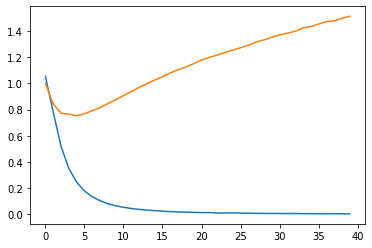

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.show()

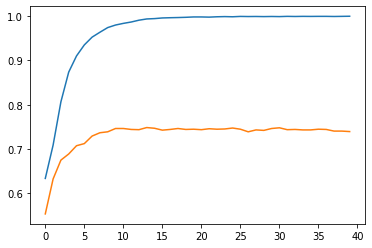

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.show()

#### AUC 
*MLP*

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle


In [ ]:
#AUC
y_predicted = model.predict(X_test_enc)
roc_auc_score(y_test_enc,y_predicted) 


0.7229466825072649

#RNN 

Recurrent Neural Network 

### "Sentence" Column  Vectorizer  - Tokenizer

Now is time to convert the sentences into integers, as long as we have already some manual text processing, we use "Tokenizer". The max words allowed to be used in our vocubulary are 15.000

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=15000, lower=True) #num_words= Number of words in the vocabulary
tokenizer

In [ ]:
import pandas as pd
import numpy as np

df = X_train
columnLenghts = np.vectorize(len)  #get the number of the lengthiest sentence 
maxColumnLenghts = columnLenghts(df.values.astype(str)).max(axis=0)
print('Max Column Lengths ', maxColumnLenghts)

Max Column Lengths  770


max lenght 770 is to big and the model would propably be very slow so 250 was used instead

In [ ]:
maxlen=250

###Padding

The dataset is tokenized and then padded to 250.

In [ ]:
import numpy as np
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

tokenizer.fit_on_texts(X_train)
x_train = tokenizer.texts_to_sequences(X_train)
x_val = tokenizer.texts_to_sequences(X_val)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_val = pad_sequences(x_val, maxlen=maxlen)



In [ ]:
len(x_train[15])

250

In [ ]:
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Dense, Embedding, LSTM, Input, Concatenate, Bidirectional, concatenate
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential

In [ ]:
max_words = 15000 #max number of words in the vocabulary

In [ ]:
max_features = max_words
batch_size = 128 #batch size
emb_dim = 100 #embedded dimensions
nb_epoch = 15 #number of epochs
nb_classes = 3 #number of classes
dropout_rate = 0.3 #dropout rate


In [ ]:
from keras import layers


### Model Building

In [ ]:

#the model
rnn_model = Sequential()
#layer of embeddings
rnn_model.add(layers.Embedding(max_features, emb_dim, input_length=maxlen))
#bidirectional LSTM layer
rnn_model.add(layers.Bidirectional(LSTM(64)))
#flatten layer
rnn_model.add(layers.Flatten())
#dense layer with 64 neurons and a relu function
rnn_model.add(layers.Dense(64, activation='relu'))
#dropout rate 30%
rnn_model.add(layers.Dropout(dropout_rate))
#layer with the 3 classes and a softmax function
rnn_model.add(layers.Dense(nb_classes,activation='softmax' ))
#checkpoint
checkpoint_RNN= ModelCheckpoint(filepath='Rnn_model.h5',mode='max',monitor='val_accuracy',verbose=2,save_best_only=True)


#model compile
rnn_model.compile('adam','categorical_crossentropy',metrics=['accuracy'])
rnn_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          1500000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               84480     
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 1,592,931
Trainable params: 1,592,931
Non-trainable params: 0
______________________________________________

In [ ]:
history_rnn= rnn_model.fit(
    x=x_train,           # features (as dense inputs)
    y=y_train_enc,           # labels
    batch_size=batch_size,   # define batch size
    epochs=nb_epoch,         # number of epochs
    verbose=2,            #the highest number
    validation_data=(       
    x_val,               # the validation split that we did before
    y_val_enc) ,
    class_weight={0:3.72610203 , 1: 2.48283828, 2:0.42939498}, #the weights of the classes
    callbacks=[checkpoint_RNN] #the checkpoint
)

Epoch 1/15

Epoch 00001: val_accuracy improved from -inf to 0.62414, saving model to Rnn_model.h5
59/59 - 108s - loss: 1.0616 - accuracy: 0.5752 - val_loss: 0.9022 - val_accuracy: 0.6241
Epoch 2/15

Epoch 00002: val_accuracy improved from 0.62414 to 0.63264, saving model to Rnn_model.h5
59/59 - 110s - loss: 0.8120 - accuracy: 0.7093 - val_loss: 0.8245 - val_accuracy: 0.6326
Epoch 3/15

Epoch 00003: val_accuracy improved from 0.63264 to 0.68102, saving model to Rnn_model.h5
59/59 - 112s - loss: 0.3960 - accuracy: 0.8615 - val_loss: 0.9058 - val_accuracy: 0.6810
Epoch 4/15

Epoch 00004: val_accuracy improved from 0.68102 to 0.72993, saving model to Rnn_model.h5
59/59 - 111s - loss: 0.1611 - accuracy: 0.9386 - val_loss: 1.0102 - val_accuracy: 0.7299
Epoch 5/15

Epoch 00005: val_accuracy did not improve from 0.72993
59/59 - 111s - loss: 0.0798 - accuracy: 0.9673 - val_loss: 1.2845 - val_accuracy: 0.7028
Epoch 6/15

Epoch 00006: val_accuracy improved from 0.72993 to 0.73046, saving model to

In [ ]:
import keras
model_RNN = keras.models.load_model('Rnn_model.h5') #load the model form checkpoint

In [ ]:
# saving the model to json format
open('Rnn_model_final.json', 'w').write(rnn_model.to_json())

2806

In [ ]:
# saving the weights of the model separately
rnn_model.save_weights('weights_RNN_final.h5')

x_test is tokenized and padded just like the x_train dataset

In [ ]:
tokenizer.fit_on_texts(X_train)
x_test = tokenizer.texts_to_sequences(X_test)
x_test = pad_sequences(x_test, maxlen=maxlen)

###Evaluation

In [ ]:
# evaluate and store on score variable on the TEST DATASET
score = model_RNN.evaluate(
    x_test,    # features
    y_test_enc,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # the most extended verbose
)

13/13 - 2s - loss: 1.5339 - accuracy: 0.7337


In [ ]:
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))


Test categorical_crossentropy: 1.5339288711547852

Test accuracy: 73.373 %


In [ ]:
# Use to yield probability distribution over the categories
y_test_pred_probs = model_RNN.predict(x_test)#the model predicts the label of each sentence
y_test_pred_probs

array([[1.2922607e-05, 1.3281951e-05, 9.9997377e-01],
       [4.7583666e-02, 2.3755289e-04, 9.5217872e-01],
       [7.6064565e-03, 9.8328662e-01, 9.1069490e-03],
       ...,
       [6.6813523e-06, 1.9036822e-06, 9.9999142e-01],
       [3.2894145e-04, 4.4664037e-01, 5.5303067e-01],
       [1.0956140e-03, 3.5595868e-03, 9.9534482e-01]], dtype=float32)

In [ ]:
y_test_pred_probs.shape


(1660, 3)

In [ ]:
# Use to yield the predicted classes.
# Depicts which class (number) is 
#the classes represent the labels, No label, Claim, Evidence
y_test_pred_probs.shape
y_test_preds = np.argmax(loaded_model.predict(x_test), axis=-1)
y_test_preds[:50]

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [ ]:
# custom prediction function by Mr.Perakis
def get_one_hot_predictions(pred_probs):
    max_probs = np.max(pred_probs, axis=1)
    max_probs = max_probs.reshape(max_probs.shape[0], 1)
    return np.equal(pred_probs, max_probs).astype(float)

In [ ]:
y_test_pred = get_one_hot_predictions(y_test_pred_probs)
y_test_pred

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
# Now, we will use the fitted One Hot Encoder to Inverse Tranform the ouput
y_test_pred_label = y_enc.inverse_transform(y_test_pred).flatten()
y_test_pred_label[:20]

array(['NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL',
       'NO LABEL', 'EVIDENCE', 'CLAIM', 'CLAIM', 'NO LABEL', 'NO LABEL',
       'NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL',
       'NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL'], dtype=object)

####Confusion Matrix


In [ ]:
#Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#Confusion Matrix
conf_mat = confusion_matrix(y_true=y_test,
                            y_pred=y_test_pred_label)

In [ ]:
pd.DataFrame(conf_mat,
             columns = y_enc.categories_,
             index=y_enc.categories_)

,CLAIM,EVIDENCE,NO LABEL
CLAIM,34,25,90
EVIDENCE,15,70,138
NO LABEL,53,121,1114


#### Classification Report

In [ ]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred_label))

              precision    recall  f1-score   support

       CLAIM       0.33      0.23      0.27       149
    EVIDENCE       0.32      0.31      0.32       223
    NO LABEL       0.83      0.86      0.85      1288

    accuracy                           0.73      1660
   macro avg       0.50      0.47      0.48      1660
weighted avg       0.72      0.73      0.72      1660



#### **Plot Loss and Accuracy**
*RNN*

In [ ]:
import matplotlib.pyplot as plt


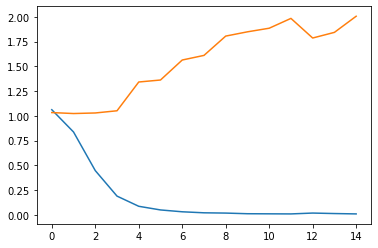

In [ ]:
plt.plot(rnn_model.history.history['loss'])
plt.plot(rnn_model.history.history['val_loss'])
plt.show()

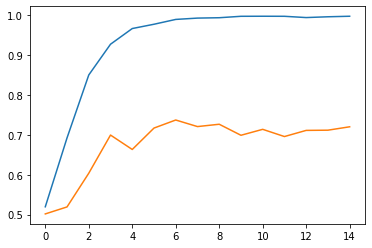

In [ ]:
plt.plot(rnn_model.history.history['accuracy'])
plt.plot(rnn_model.history.history['val_accuracy'])
plt.show()

####AUC 

*RNN*


In [ ]:
y_predicted = model_RNN.predict(x_test)
roc_auc_score(y_test_enc,y_predicted) 

0.7037199859556473

#CNN

Convolutional Neural Network

*Code Sources*

http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/

https://realpython.com/python-keras-text-classification/

### Model Building

In [ ]:
embedding_dim = 450

model_cnn = Sequential()
#embeddings layer
model_cnn.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
#filter layer
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
#max pooling layer
model_cnn.add(layers.GlobalMaxPooling1D())
#dense layer- 64 neurons- relu activation function
model_cnn.add(layers.Dense(64, activation='relu'))
#dropout layer
model_cnn.add(layers.Dropout(dropout_rate))
#layer with 3 classes and softmax function
model_cnn.add(layers.Dense(nb_classes, activation='softmax'))
#model compile
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#checkpoint
checkpoint_CNN= ModelCheckpoint(filepath='CNN_model.h5',mode='max',monitor='val_accuracy',verbose=2,save_best_only=True)
model_cnn.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 450)          6750000   
_________________________________________________________________
conv1d (Conv1D)              (None, 246, 128)          288128    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 7,046,579
Trainable params: 7,046,579
Non-trainable params: 0
______________________________________________

In [ ]:
history_CNN= model_cnn.fit(
    x=x_train,           # features (as dense inputs)
    y=y_train_enc,           # labels
    batch_size=batch_size,   # define batch size
    epochs=20,         # number of epochs
    verbose=2,        #so we can see the progress of each epoch
    validation_data=(       
    x_val,               # the validation split that we did before
    y_val_enc),
    callbacks=[checkpoint_CNN],
    class_weight={0:3.72610203 , 1: 2.48283828, 2:0.42939498}
)


Epoch 1/20

Epoch 00001: val_accuracy improved from -inf to 0.63902, saving model to CNN_model.h5
59/59 - 7s - loss: 1.0245 - accuracy: 0.4951 - val_loss: 0.9263 - val_accuracy: 0.6390
Epoch 2/20

Epoch 00002: val_accuracy improved from 0.63902 to 0.75226, saving model to CNN_model.h5
59/59 - 6s - loss: 0.5855 - accuracy: 0.8211 - val_loss: 0.6263 - val_accuracy: 0.7523
Epoch 3/20

Epoch 00003: val_accuracy improved from 0.75226 to 0.76396, saving model to CNN_model.h5
59/59 - 7s - loss: 0.1597 - accuracy: 0.9539 - val_loss: 0.6587 - val_accuracy: 0.7640
Epoch 4/20

Epoch 00004: val_accuracy improved from 0.76396 to 0.78150, saving model to CNN_model.h5
59/59 - 7s - loss: 0.0483 - accuracy: 0.9884 - val_loss: 0.7266 - val_accuracy: 0.7815
Epoch 5/20

Epoch 00005: val_accuracy improved from 0.78150 to 0.79798, saving model to CNN_model.h5
59/59 - 7s - loss: 0.0236 - accuracy: 0.9967 - val_loss: 0.8135 - val_accuracy: 0.7980
Epoch 6/20

Epoch 00006: val_accuracy did not improve from 0.79

In [ ]:
import keras
model_Cnn = keras.models.load_model('CNN_model.h5') #take the model from checkpoint

In [ ]:
# saving the model to json format
open('cnn_model_better.json', 'w').write( model_Cnn.to_json())

2404

In [ ]:
# saving the weights of the model separately
model_cnn.save_weights('weights_cnn_best.h5')

###Evaluation

In [ ]:
# evaluate and store on score variable on the TEST DATASET
score = model_Cnn.evaluate(
    x_test,    # features
    y_test_enc,              # labels
    batch_size=batch_size,   # batch size
    verbose=2                # so we can see the progress of each epoch
)

17/17 - 0s - loss: 0.7201 - accuracy: 0.8036


In [ ]:
print('\nTest categorical_crossentropy: {}'.format(score[0]))
print('\nTest accuracy: {:.3f} %'.format(score[1]*100))


Test categorical_crossentropy: 0.7201085686683655

Test accuracy: 80.361 %


In [ ]:
# Use to yield probability distribution over the categories
y_test_pred_probs = model_Cnn.predict(x_test)
y_test_pred_probs

array([[2.1269068e-04, 2.2532672e-04, 9.9956197e-01],
       [1.4886199e-01, 7.0293975e-01, 1.4819826e-01],
       [3.3636486e-06, 8.5094334e-06, 9.9998808e-01],
       ...,
       [3.1710626e-04, 1.7682534e-05, 9.9966526e-01],
       [4.9987412e-04, 3.8421995e-04, 9.9911588e-01],
       [1.8412277e-02, 2.4369738e-01, 7.3789030e-01]], dtype=float32)

In [ ]:
# Use to yield the predicted classes.
# Depicts which class (number) is 
y_test_pred_probs.shape
y_test_preds = np.argmax(model_Cnn.predict(x_test), axis=-1)
y_test_preds[:50]

array([2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [ ]:
# custom prediction function 
def get_one_hot_predictions(pred_probs):
    max_probs = np.max(pred_probs, axis=1)
    # reshaping to (len_of_predicts, 1)
    max_probs = max_probs.reshape(max_probs.shape[0], 1)

    return np.equal(pred_probs, max_probs).astype(float)

In [ ]:
y_test_pred = get_one_hot_predictions(y_test_pred_probs)
y_test_pred

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
# Now, we will use the fitted One Hot Encoder to Inverse Tranform the ouput
y_test_pred_label = y_enc.inverse_transform(y_test_pred).flatten()
y_test_pred_label[:20]

array(['NO LABEL', 'EVIDENCE', 'NO LABEL', 'NO LABEL', 'NO LABEL',
       'NO LABEL', 'NO LABEL', 'NO LABEL', 'CLAIM', 'NO LABEL',
       'EVIDENCE', 'NO LABEL', 'EVIDENCE', 'NO LABEL', 'NO LABEL',
       'NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL', 'EVIDENCE'],
      dtype=object)

### Confusion Matrix 

In [ ]:
#Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
conf_mat = confusion_matrix(y_true=y_test,
                            y_pred=y_test_pred_label)

In [ ]:
pd.DataFrame(conf_mat,
             columns = y_enc.categories_,
             index=y_enc.categories_)

,CLAIM,EVIDENCE,NO LABEL
CLAIM,55,15,79
EVIDENCE,11,65,147
NO LABEL,15,59,1214


### Classification Report

In [ ]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred_label))

              precision    recall  f1-score   support

       CLAIM       0.68      0.37      0.48       149
    EVIDENCE       0.47      0.29      0.36       223
    NO LABEL       0.84      0.94      0.89      1288

    accuracy                           0.80      1660
   macro avg       0.66      0.53      0.58      1660
weighted avg       0.78      0.80      0.78      1660



### **Plot Loss and Accuracy**
*CNN*

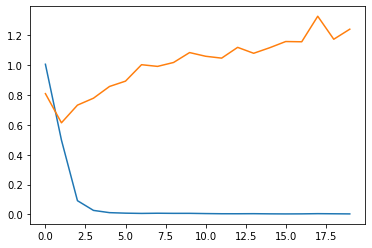

In [ ]:
plt.plot(model_cnn.history.history['loss'])
plt.plot(model_cnn.history.history['val_loss'])
plt.show()

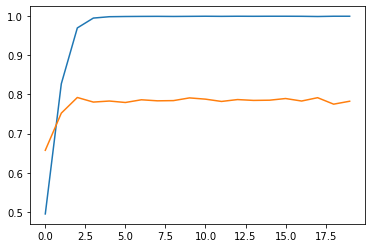

In [ ]:
plt.plot(model_cnn.history.history['accuracy'])
plt.plot(model_cnn.history.history['val_accuracy'])
plt.show()

### AUC 

*CNN*

In [ ]:
y_predicted = model_Cnn.predict(x_test)
roc_auc_score(y_test_enc,y_predicted) 

0.8253147093149077

#Blind Test Dataset

*Test on completely new data, without the labels*


The new data are uploaded in a folder name "argument_test". The same function as before is used, but this time instead of a second column that says the label, another column was aded that indicated from which file the sentence was originally from. This will be usefull later

In [ ]:
class ArgumentParser:

    @staticmethod
    def get_argument_files():
        return list(Path('argument_test').glob('**/*.csv'))
    def setup_without_context(self):
        i=0
        files = self.get_argument_files()
        frames = list()
        #extra line to get the name of the paper 
        p = list(Path('argument').glob('**/*.csv'))[i] #the path i is saved
        for file_path in tqdm(files): 
            p = list(Path('argument').glob('**/*.csv'))[i]
            df = pd.read_csv(file_path, header=None, names=['sentence']) 
            #creating a new column to keep the name
            df['fileName']=   p.name    
            frames.append(df)
            i=i+1 #every time a new file
        data = pd.concat(frames).reset_index(drop=True)
        return {'X': data['sentence'].tolist(),
                'df': data}
if __name__ == "__main__":
    parser = ArgumentParser()
    swc_doc = parser.setup_without_context()
    pprint(swc_doc['X'][:5])


100%|██████████| 99/99 [00:00<00:00, 234.09it/s]

['The influence of religion and culture on women’s rights to property in '
 'Nigeria',
 'The paper seeks to establish the role of religion and culture in the '
 'realization of women’s rights to property in Nigeria.',
 'It begins by affirming that protecting women’s rights to property in Nigeria '
 'is a fundamental step towards achieving the 5th Sustainable Development Goal '
 'of gender equality.',
 'The promotion and protection of these rights in any society are determined '
 'by several factors such as the customs, prevailing traditions, as well as '
 'the religious laws that control behavioral patterns in that society.',
 'In discussing this within the Nigerian context, the paper explores the '
 'tenets of Christianity and Islam that govern women’s rights to property.']


In [ ]:
swc_doc['df'].head(25) #check the results

,sentence,fileName
0,The influence of religion and culture on women...,DIK_G2B3_31.csv
1,The paper seeks to establish the role of relig...,DIK_G2B3_31.csv
2,It begins by affirming that protecting women’s...,DIK_G2B3_31.csv
3,The promotion and protection of these rights i...,DIK_G2B3_31.csv
4,In discussing this within the Nigerian context...,DIK_G2B3_31.csv
5,The study used secondary data derived from art...,DIK_G2B3_31.csv
6,A total of nine articles was reviewed.,DIK_G2B3_31.csv
7,"The paper reveals that, culturally, women are ...",DIK_G2B3_31.csv
8,"However, the tenets of both Islam and Christia...",DIK_G2B3_31.csv
9,The authors suggest that the prevailing discri...,DIK_G2B3_31.csv


In [ ]:
#now we need to clean the sentences, so they are ready for the test procedure
swc_doc['df']['sentence']= swc_doc['df']['sentence'].str.replace('[^\w\s]','')
swc_doc['df']['sentence']= swc_doc['df']['sentence'].str.lower()

swc_doc['df'].head(15)

,sentence,fileName
0,the influence of religion and culture on women...,DIK_G2B3_31.csv
1,the paper seeks to establish the role of relig...,DIK_G2B3_31.csv
2,it begins by affirming that protecting womens ...,DIK_G2B3_31.csv
3,the promotion and protection of these rights i...,DIK_G2B3_31.csv
4,in discussing this within the nigerian context...,DIK_G2B3_31.csv
5,the study used secondary data derived from art...,DIK_G2B3_31.csv
6,a total of nine articles was reviewed,DIK_G2B3_31.csv
7,the paper reveals that culturally women are vi...,DIK_G2B3_31.csv
8,however the tenets of both islam and christian...,DIK_G2B3_31.csv
9,the authors suggest that the prevailing discri...,DIK_G2B3_31.csv


In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#the process is the same as before
tokens = [word_tokenize(sen) for sen in swc_doc['df']['sentence']]
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

#removing the stopwords from the data
stoplist = stopwords.words('english')
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]
filtered_words = [removeStopWords(sen) for sen in lower_tokens]
swc_doc['df']['sentence'] = [' '.join(sen) for sen in filtered_words]


In [ ]:
swc_doc['df'].head(20)

,sentence,fileName
0,influence religion culture womens rights prope...,DIK_G2B3_31.csv
1,paper seeks establish role religion culture re...,DIK_G2B3_31.csv
2,begins affirming protecting womens rights prop...,DIK_G2B3_31.csv
3,promotion protection rights society determined...,DIK_G2B3_31.csv
4,discussing within nigerian context paper explo...,DIK_G2B3_31.csv
5,study used secondary data derived articles sou...,DIK_G2B3_31.csv
6,total nine articles reviewed,DIK_G2B3_31.csv
7,paper reveals culturally women viewed inferior...,DIK_G2B3_31.csv
8,however tenets islam christianity disregard wo...,DIK_G2B3_31.csv
9,authors suggest prevailing discrimination wome...,DIK_G2B3_31.csv


In [ ]:
data=swc_doc['df']
data.head(5)

,sentence,fileName
0,influence religion culture womens rights prope...,DIK_G2B3_31.csv
1,paper seeks establish role religion culture re...,DIK_G2B3_31.csv
2,begins affirming protecting womens rights prop...,DIK_G2B3_31.csv
3,promotion protection rights society determined...,DIK_G2B3_31.csv
4,discussing within nigerian context paper explo...,DIK_G2B3_31.csv


In [ ]:
import numpy as np
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=15000, lower=True)
tokenizer.fit_on_texts(data['sentence'])
data['Tokenized_Sentences'] = tokenizer.texts_to_sequences(data['sentence'])


x = pad_sequences(data['Tokenized_Sentences'] , maxlen=250)

In [ ]:
x

array([[   0,    0,    0, ...,  314,  727,  207],
       [   0,    0,    0, ...,  314,  727,  207],
       [   0,    0,    0, ...,  365,   14,  153],
       ...,
       [   0,    0,    0, ...,  228,  262,   15],
       [   0,    0,    0, ...,  106, 4484, 1111],
       [   0,    0,    0, ...,  465,   11,  109]], dtype=int32)

In [ ]:
from keras.models import model_from_json
import keras

#https://machinelearningmastery.com/save-load-keras-deep-learning-models/
#the most efficient model that was created was the CNN model. It was previously saved in json format and its weights seperately in .h5 format.
# load json and create model
json_file = open('cnn_model_better.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("weights_cnn_best.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
# Use to yield probability distribution over the categories
y_test_pred_probs = loaded_model.predict(x)
y_test_pred_probs



array([[1.6739496e-05, 9.2832692e-05, 9.9989045e-01],
       [6.6258668e-05, 9.0498915e-03, 9.9088389e-01],
       [8.2826728e-06, 1.2464829e-04, 9.9986708e-01],
       ...,
       [1.3385723e-04, 7.7237433e-05, 9.9978894e-01],
       [3.2067043e-04, 3.7054762e-03, 9.9597389e-01],
       [2.2651782e-06, 1.5182516e-06, 9.9999619e-01]], dtype=float32)

In [ ]:
# Use to yield the predicted classes.
# Depicts which class (number) is 

# y_test_preds = model.predict_classes(X_test_enc)
y_test_pred_probs.shape

y_test_preds = np.argmax(loaded_model.predict(x), axis=-1)

y_test_preds[:50]

# custom prediction function provided by mr.Perakis
def get_one_hot_predictions(pred_probs):
    max_probs = np.max(pred_probs, axis=1)
    max_probs = max_probs.reshape(max_probs.shape[0], 1)

    return np.equal(pred_probs, max_probs).astype(float)

y_test_pred = get_one_hot_predictions(y_test_pred_probs)
y_test_pred

# Now, we will use the fitted One Hot Encoder to Inverse Tranform the ouput
y_test_pred_label = y_enc.inverse_transform(y_test_pred).flatten()
y_test_pred_label[:20]


array(['NO LABEL', 'NO LABEL', 'NO LABEL', 'EVIDENCE', 'NO LABEL',
       'NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL',
       'NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL',
       'NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL', 'NO LABEL'],
      dtype=object)

In [ ]:
labels_predicted = np.array(y_test_pred_label)
df = pd.DataFrame(data=y_test_pred_label, columns=["labels"])

In [ ]:
df

,labels
0,NO LABEL
1,NO LABEL
2,NO LABEL
3,EVIDENCE
4,NO LABEL
...,...
1239,NO LABEL
1240,NO LABEL
1241,NO LABEL
1242,NO LABEL


In [ ]:
data['labels']=df
data

,sentence,fileName,Tokenized_Sentences,labels
0,influence religion culture womens rights prope...,DIK_G2B3_31.csv,"[166, 872, 429, 47, 314, 727, 207]",NO LABEL
1,paper seeks establish role religion culture re...,DIK_G2B3_31.csv,"[55, 1491, 1492, 364, 872, 429, 2245, 47, 314,...",NO LABEL
2,begins affirming protecting womens rights prop...,DIK_G2B3_31.csv,"[2246, 2247, 2248, 47, 314, 727, 207, 1493, 11...",NO LABEL
3,promotion protection rights society determined...,DIK_G2B3_31.csv,"[1113, 1114, 314, 512, 599, 255, 123, 2250, 14...",EVIDENCE
4,discussing within nigerian context paper explo...,DIK_G2B3_31.csv,"[1496, 283, 2252, 431, 55, 873, 1497, 1498, 14...",NO LABEL
...,...,...,...,...
1239,limitations low rate autopsies serbia well acc...,ABC_G1B1_Corpus ID 212668818.csv,"[942, 144, 18, 4481, 489, 124, 1956, 574, 1531...",NO LABEL
1240,conclusions downward trend suicide mortality o...,ABC_G1B1_Corpus ID 212668818.csv,"[69, 4482, 163, 11, 8, 570, 489, 832, 79, 708]",NO LABEL
1241,however suicide rates still high serbia compar...,ABC_G1B1_Corpus ID 212668818.csv,"[39, 11, 38, 290, 40, 489, 36, 38, 228, 262, 15]",NO LABEL
1242,particularly worrisome increase mortality olde...,ABC_G1B1_Corpus ID 212668818.csv,"[253, 4483, 92, 8, 550, 89, 285, 91, 494, 228,...",NO LABEL


In [ ]:
data=data.drop(['Tokenized_Sentences', 'sentence'], axis=1) #the two columns are not needed in the final file


In [ ]:
data

,fileName,labels
0,DIK_G2B3_31.csv,-
1,DIK_G2B3_31.csv,-
2,DIK_G2B3_31.csv,-
3,DIK_G2B3_31.csv,EVIDENCE
4,DIK_G2B3_31.csv,-
...,...,...
1239,ABC_G1B1_Corpus ID 212668818.csv,-
1240,ABC_G1B1_Corpus ID 212668818.csv,-
1241,ABC_G1B1_Corpus ID 212668818.csv,-
1242,ABC_G1B1_Corpus ID 212668818.csv,-


The data are not in the desired format by Mr.Fraggedis. 

In [ ]:
data['labels']=data['labels'].str.replace("NO LABEL", "-")
data.head(25)

,fileName,labels
0,DIK_G2B3_31.csv,-
1,DIK_G2B3_31.csv,-
2,DIK_G2B3_31.csv,-
3,DIK_G2B3_31.csv,EVIDENCE
4,DIK_G2B3_31.csv,-
5,DIK_G2B3_31.csv,-
6,DIK_G2B3_31.csv,-
7,DIK_G2B3_31.csv,-
8,DIK_G2B3_31.csv,-
9,DIK_G2B3_31.csv,-


In [ ]:
data['fileName'].nunique() #checking if the number of files is correct

99

In [ ]:
new_df = pd.DataFrame(np.zeros((len(data)+100, 1)))


In [ ]:
new_df=new_df.rename(columns={ 0 : 'Value'})


In [ ]:
new_df

,Value
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1339,0.0
1340,0.0
1341,0.0
1342,0.0


In [ ]:
file=data['fileName'][0]
file

'DIK_G2B3_31.csv'

In [ ]:
new_df['Value'][0]=file
new_df.head(5)

,Value
0,DIK_G2B3_31.csv
1,0
2,0
3,0
4,0


In [ ]:
j=1

In [ ]:
count=1

In [ ]:
file

'DIK_G2B3_31.csv'

Using a for loop the data are transformed into the desired output

In [ ]:
for i in range(0,len(data)):
  if (data['fileName'][i]==file):  #checks we are still in the same file
    new_df['Value'][j]=data['labels'][i] #if we are we take the label of the sentence
    j=j+1 #move the index
  else:
    count=count+1 #this is a counter for personal use, to see if all 99 files are in the new_df
    file=data['fileName'][i] #the file is changed 
    new_df['Value'][j]=file #it must be appended to the new_df
    j=j+1



In [ ]:
count

99

In [ ]:
new_df = new_df[(new_df.T != 0).any()] #the extra rows are removed

In [ ]:
new_df['Value'].tail(20) #the tail of the new df is checked. if it matches the data tail, and it does

1225                                   -
1226    ABC_G1B1_Corpus ID 212668818.csv
1227                                   -
1228                                   -
1229                                   -
1230                                   -
1231                                   -
1232                                   -
1233                                   -
1234                                   -
1235                                   -
1236                                   -
1237                                   -
1238                                   -
1239                                   -
1240                                   -
1241                                   -
1242                                   -
1243                                   -
1244                                   -
Name: Value, dtype: object

In [ ]:
data.tail(20)

,fileName,labels
1224,DEK_G2B2_27.csv,-
1225,ABC_G1B1_Corpus ID 212668818.csv,-
1226,ABC_G1B1_Corpus ID 212668818.csv,-
1227,ABC_G1B1_Corpus ID 212668818.csv,-
1228,ABC_G1B1_Corpus ID 212668818.csv,-
1229,ABC_G1B1_Corpus ID 212668818.csv,-
1230,ABC_G1B1_Corpus ID 212668818.csv,-
1231,ABC_G1B1_Corpus ID 212668818.csv,-
1232,ABC_G1B1_Corpus ID 212668818.csv,-
1233,ABC_G1B1_Corpus ID 212668818.csv,-


In [ ]:
new_df.to_csv(r'group4_argument_predictions.csv') #the results are saved for mr Fraggedis


# Appendix

**ROC PLOT**

*MLP*

In [ ]:

#function by Mr Perakis
def plot_multi_class_roc_auc_curves(nb_classes, y_true, y_pred_score, lw: int = 2):
    """
    ROC, AUC for a categorical classifier
    
    ROC curve extends to problems with three or more classes with what is known as the one-vs-all approach.
    For instance, if we have three classes, we will create three ROC curves,

    For each class, we take it as the positive class and group the rest classes jointly as the negative class.

    Class 1 vs classes 2&3
    Class 2 vs classes 1&3
    Class 3 vs classes 1&2

    :param nb_classes:
    :param y_true:
    :param y_pred_score:
    :param lw:
    :return:
    """

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(nb_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_score[:, i])

        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_score.ravel())

    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nb_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(nb_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= nb_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(1)
    plt.plot(fpr["micro"],
             tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
             color='deeppink',
             linestyle=':',
             linewidth=4)

    plt.plot(fpr["macro"],
             tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
             color='navy',
             linestyle=':',
             linewidth=4)

    colors = cycle(['aqua',
                    'darkorange',
                    'cornflowerblue'])

    for i, color in zip(range(nb_classes), colors):
        plt.plot(fpr[i],
                 tpr[i],
                 color=color,
                 lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1],
             [0, 1],
             'k--',
             lw=lw)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    # plt.show()

   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


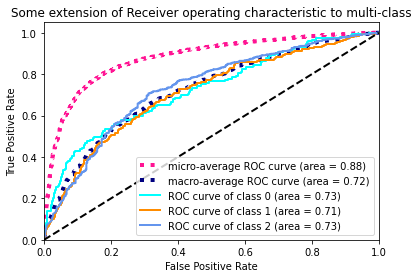

In [ ]:
plot_multi_class_roc_auc_curves(nb_classes=3,
                                    y_true=y_test_enc,
                                    y_pred_score=y_predicted)
